In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/apple/Documents/PyTorch_Tutorial/Data/iris.csv")

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.shape

(150, 5)

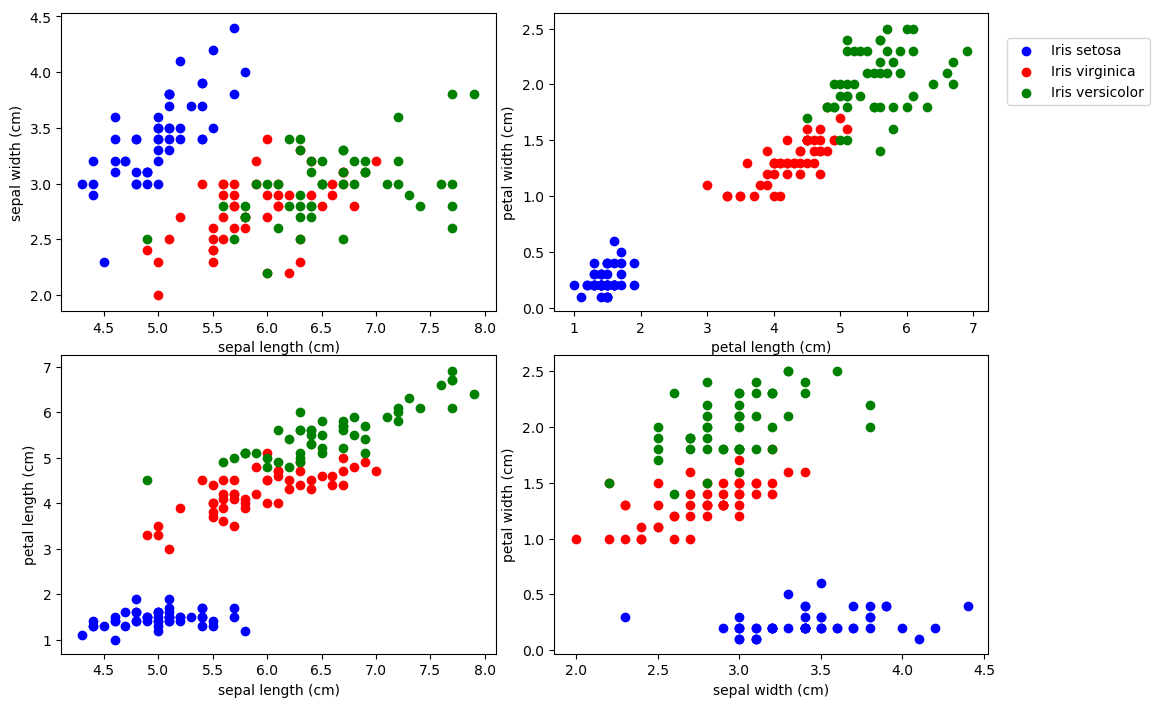

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df["target"]==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

### Manual process of creating a Tensor from a dataset.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
features = df.drop('target', axis=1).values
labels = df['target'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

### PyTorch process of creating a Tensor from a dataset.

In [15]:
from torch.utils.data import TensorDataset, DataLoader

In [16]:
data = df.drop('target', axis=1).values
labels = df['target'].values

In [17]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [18]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [19]:
len(iris)

150

In [21]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [22]:
iris_loader = DataLoader(iris,batch_size=50,shuffle=True)

In [24]:
for batch in iris_loader:
    print(batch)

[tensor([[6.4000, 3.2000, 5.3000, 2.3000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.5000, 3.2000, 5.1000, 2.0000],
        [5.1000, 3.5000, 1.4000, 